In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets.dblp import DBLP
import matplotlib.pyplot as plt

## DBLP

In [2]:
FEATURE_SIZE = 50

In [3]:
dataset = DBLP(root='./dblp_data', transform=T.Constant(node_types='conference'))
data = dataset[0]
author = data['author'].x.tolist()
df = pd.DataFrame(author)
df['class'] = data['author'].y.tolist()

### Feature selection from Bag-of-Words features of Author node using most frequent occurences

In [4]:
def get_selected_features(X):
    col_sum = X.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)[:50]
    
    colsum_df = pd.DataFrame(col_sum)
    index_list = list(np.ravel(colsum_df[colsum_df[0].isin(sorted_colsum)].index))

    imp_feat = X[index_list]
    return imp_feat.iloc[:, : 50]

In [5]:
# Feature selection for Author class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0
imp_feat0 = get_selected_features(class0)
imp_feat0.head()

,1,9,10,13,14,15,22,23,44,63,...,253,258,293,295,296,304,313,321,326,329
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Author class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1
imp_feat1 = get_selected_features(class1)
imp_feat1.head()

,9,10,11,15,19,23,35,39,63,64,...,285,293,295,302,304,313,314,321,324,329
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Feature selection for Author class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2
imp_feat2 = get_selected_features(class2)
imp_feat2.head()

,9,10,11,15,21,23,25,31,35,54,...,253,256,273,287,295,296,300,303,304,308
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Feature selection for Author class 3
class3 = df[df['class'] == 3].drop(['class'], axis=1)
X = class3
imp_feat3 = get_selected_features(class3)
imp_feat3.head()

,11,15,21,23,35,39,57,63,81,82,...,258,290,295,296,301,302,307,320,321,324
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Author node sampled using Diffusion Models

In [9]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/TabDDPM/dblp/frequency/'

In [10]:
sampled0  = pd.DataFrame(np.load(class_path +'author0_50.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE]
sampled0.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [11]:
sampled1  = pd.DataFrame(np.load(class_path +'author1_50.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE]
sampled1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [12]:
sampled2  = pd.DataFrame(np.load(class_path +'author2_50.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE]
sampled2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [13]:
sampled3  = pd.DataFrame(np.load(class_path +'author3_50.npy',allow_pickle=True)).iloc[:, : FEATURE_SIZE]
sampled3.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Author class 0

In [15]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.13867505, 0.        , 0.        , ..., 0.28867513, 0.14433757,
        0.24618298],
       [0.29649973, 0.35714286, 0.21821789, ..., 0.23145502, 0.23145502,
        0.26318068],
       [0.2773501 , 0.46770717, 0.34020691, ..., 0.14433757, 0.        ,
        0.18463724],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13867505, 0.26726124, 0.13608276, ..., 0.14433757, 0.        ,
        0.        ]])

In [16]:
sns.set(font_scale=1.4)

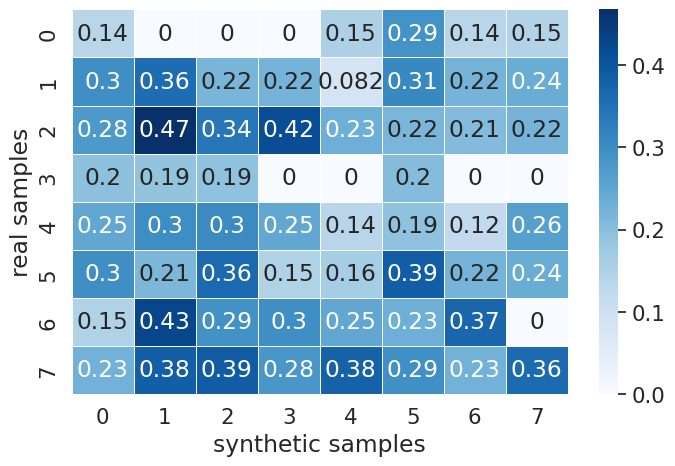

In [17]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [18]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.2321472832684762

Author class 1

In [19]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.14433757, 0.15075567, 0.12909944, ..., 0.        , 0.15075567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18463724, 0.1928473 , 0.38533732, ..., 0.36181361, 0.25712974,
        0.30772873],
       ...,
       [0.        , 0.15075567, 0.        , ..., 0.14142136, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18257419, 0.09534626, 0.24494897, ..., 0.4472136 , 0.19069252,
        0.45643546]])

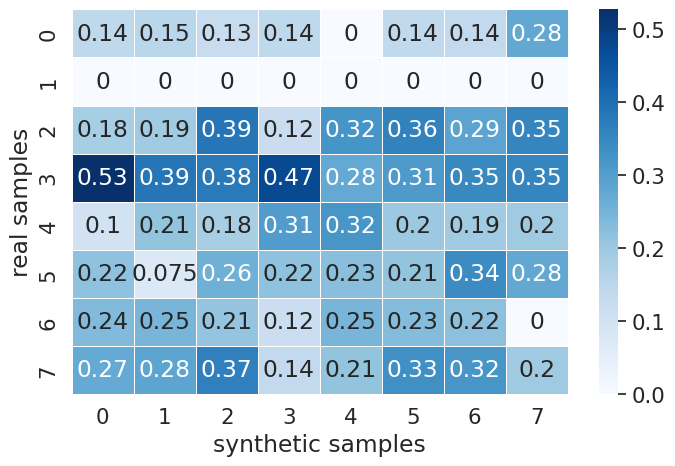

In [20]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [21]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.23966382082751397

Author class 2

In [22]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.25197632, 0.        , 0.1132277 , ..., 0.22222222, 0.23570226,
        0.31622777],
       [0.38575837, 0.07715167, 0.13867505, ..., 0.20412415, 0.28867513,
        0.12909944],
       [0.25717225, 0.3086067 , 0.36980013, ..., 0.49897013, 0.38490018,
        0.51639778],
       ...,
       [0.15430335, 0.15430335, 0.13867505, ..., 0.13608276, 0.        ,
        0.25819889],
       [0.25197632, 0.12598816, 0.1132277 , ..., 0.33333333, 0.23570226,
        0.21081851],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

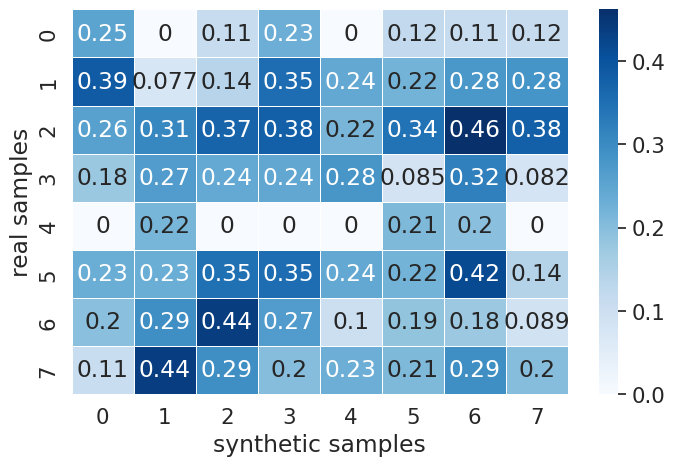

In [23]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [24]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.18773887413397305

Author class 3

In [25]:
real_class3 = np.array(imp_feat3)
cosine_sim(real_class3,sampled3)

array([[0.13608276, 0.13608276, 0.13608276, ..., 0.13608276, 0.13608276,
        0.13608276],
       [0.34426519, 0.34426519, 0.34426519, ..., 0.34426519, 0.34426519,
        0.34426519],
       [0.36514837, 0.36514837, 0.36514837, ..., 0.36514837, 0.36514837,
        0.36514837],
       ...,
       [0.19245009, 0.19245009, 0.19245009, ..., 0.19245009, 0.19245009,
        0.19245009],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

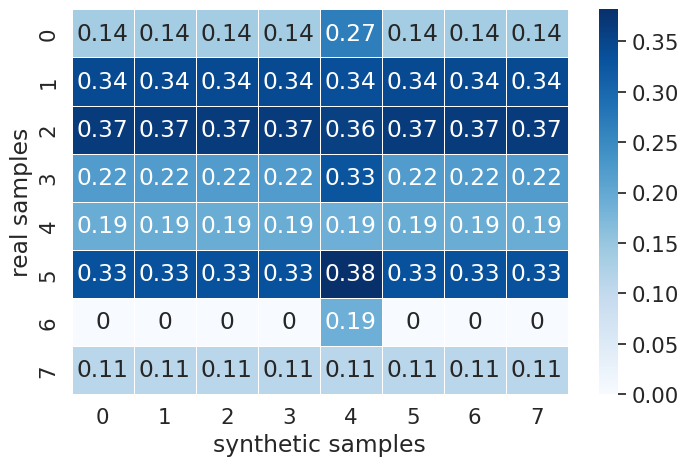

In [26]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class3[:8],sampled3[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [27]:
avg_cossim_class3 = np.mean(cosine_sim(real_class3,sampled3))
avg_cossim_class3

0.2498587034188328

In [28]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2 + avg_cossim_class3)/4

0.227352170412199